# Becomexpert AI Course: HW4 -- Sajad Chelabi

# ++++++++++++++++++++++++
## Part 1: Customer Churn Prediction
# ++++++++++++++++++++++++
### Build a fully connected Neural Network to predict whether a customer will exit the company regarding a set of measured features.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

## Import Data
### Read 'Churn_Modelling.csv' dataset with pandas

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## ************************************************
## Task 1: Clean and Preprocess the Data
## ************************************************
### Handle duplicates: Drop any duplicated data from dataframe and reset index.

In [3]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Statistics: Check data description such as mean, minimum, and maximum values of each feature.

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data types: Check data types of each column to make sure about the correct types for any of them.

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### So, categorical values are object and numerical values are in int and float types which are correct.

### Handle null values: Check any missed data and null values in the dataset to remove it or change to some value such as mean of that column.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### According to the above information, there is not any null values in the dataset.

### Drop not related columns from the dataframe
#### 'RowNumber', 'CustomerId', and 'Surname' are have not any relation to the prediction and act like an ID. So, make the dataframe more effective and cleaner by dropping these columns.

In [26]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### Change categorized featuers into the numerical values such as 'Geography' and 'Gender'

In [27]:
df.Geography.value_counts().to_frame()

,count
Geography,
France,5014
Germany,2509
Spain,2477


#### There is only exist three classes of geography that allows us to use one-hot encoding method without make the dataframe columns too long.

### One-hot encoding

In [28]:
df = df.join(pd.get_dummies(df.Geography).astype(int)).drop('Geography', axis=1)

In [29]:
df.Gender.value_counts().to_frame()

,count
Gender,
Male,5457
Female,4543


#### Gender includes only two category which allows us to utilize binary encoding method and make it numerical easily.

### Binary encoding

In [30]:
df.Gender = df.Gender.apply(lambda x: 1 if x == 'Male' else 0)
df.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  int32  
 11  Germany          10000 non-null  int32  
 12  Spain            10000 non-null  int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


### Data type correction

In [52]:
df.CreditScore = df.CreditScore.astype(np.int16)
df.Gender = df.Gender.astype(np.int8)
df.Age = df.Age.astype(np.int8)
df.Tenure = df.Tenure.astype(np.int8)
df.NumOfProducts = df.NumOfProducts.astype(np.int8)
df.HasCrCard = df.HasCrCard.astype(np.int8)
df.IsActiveMember = df.IsActiveMember.astype(np.int8)
df.EstimatedSalary = df.EstimatedSalary.astype(np.float32)
df.Exited = df.Exited.astype(np.int8)
df.France = df.France.astype(np.int8)
df.Germany = df.Germany.astype(np.int8)
df.Spain = df.Spain.astype(np.int8)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int16  
 1   Gender           10000 non-null  int8   
 2   Age              10000 non-null  int8   
 3   Tenure           10000 non-null  int8   
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int8   
 6   HasCrCard        10000 non-null  int8   
 7   IsActiveMember   10000 non-null  int8   
 8   EstimatedSalary  10000 non-null  float32
 9   Exited           10000 non-null  int8   
 10  France           10000 non-null  int8   
 11  Germany          10000 non-null  int8   
 12  Spain            10000 non-null  int8   
dtypes: float32(1), float64(1), int16(1), int8(10)
memory usage: 234.5 KB


#### So, all values are non-null and numerical. The final dataset contains 12 cleaned and preprocessed features and one target.

## *******************************
## Task 2: Create the Model
## *******************************
### Construct and train a fully connected Neural Network for predicting the customer churn and optimize it.

### Split the data: Create input(X) and output(y) of the model, then using 20% of the data for the test set and 80% for the train set.

In [53]:
X = df.drop('Exited', axis=1)     # Features
y = df.Exited                     # Target

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Data normalization: Standardize data with StandardScaler instance before build the model.

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build fully connected NN: Input layer with 64 neurons, hidden layer with 64 neurons, and output layer with 1 neuron which classify the output into 0 and 1 classes related to the target.

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[12]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    # Using sigmoid to produce 0 and 1 for binary classification
])

C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the model: Using adam optimizer, binary cross entropy loss function, and accuracy metrics for evaluation.

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the model: Create history object to visualize the model performance.

In [58]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7925 - loss: 0.4690 - val_accuracy: 0.8410 - val_loss: 0.3909
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8353 - loss: 0.3896 - val_accuracy: 0.8620 - val_loss: 0.3516
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.3496 - val_accuracy: 0.8590 - val_loss: 0.3475
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8506 - loss: 0.3485 - val_accuracy: 0.8695 - val_loss: 0.3393
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8626 - loss: 0.3364 - val_accuracy: 0.8615 - val_loss: 0.3375
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.3264 - val_accuracy: 0.8585 - val_loss: 0.3390
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8600 - loss: 0.3405 - val_accuracy: 0.8535 - val_loss: 0.3452
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3243 - val_accu

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8891 - loss: 0.2609 - val_accuracy: 0.8550 - val_loss: 0.3727
Epoch 52/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8925 - loss: 0.2548 - val_accuracy: 0.8545 - val_loss: 0.3667
Epoch 53/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8915 - loss: 0.2622 - val_accuracy: 0.8595 - val_loss: 0.3716
Epoch 54/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8988 - loss: 0.2413 - val_accuracy: 0.8530 - val_loss: 0.3725
Epoch 55/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8973 - loss: 0.2527 - val_accuracy: 0.8535 - val_loss: 0.3827
Epoch 56/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9034 - loss: 0.2490 - val_accuracy: 0.8495 - val_loss: 0.3905
Epoch 57/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8953 - loss: 0.2531 - val_accuracy: 0.8560 - val_loss: 0.3800
Epoch 58/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9013 - loss: 0.2429 - val_accuracy:

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9139 - loss: 0.1986 - val_accuracy: 0.8445 - val_loss: 0.4514
Epoch 102/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9178 - loss: 0.1990 - val_accuracy: 0.8295 - val_loss: 0.4680
Epoch 103/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9132 - loss: 0.2044 - val_accuracy: 0.8370 - val_loss: 0.4561
Epoch 104/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.1964 - val_accuracy: 0.8415 - val_loss: 0.4598
Epoch 105/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9160 - loss: 0.1963 - val_accuracy: 0.8405 - val_loss: 0.4498
Epoch 106/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9191 - loss: 0.1999 - val_accuracy: 0.8395 - val_loss: 0.4565
Epoch 107/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2051 - val_accuracy: 0.8415 - val_loss: 0.4540
Epoch 108/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9197 - loss: 0.1921 - val_ac

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9359 - loss: 0.1601 - val_accuracy: 0.8320 - val_loss: 0.5426
Epoch 151/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9348 - loss: 0.1628 - val_accuracy: 0.8305 - val_loss: 0.5479
Epoch 152/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9405 - loss: 0.1490 - val_accuracy: 0.8085 - val_loss: 0.5688
Epoch 153/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9406 - loss: 0.1550 - val_accuracy: 0.8375 - val_loss: 0.5463
Epoch 154/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.1597 - val_accuracy: 0.8300 - val_loss: 0.5530
Epoch 155/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9335 - loss: 0.1652 - val_accuracy: 0.8270 - val_loss: 0.5500
Epoch 156/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9368 - loss: 0.1509 - val_accuracy: 0.8355 - val_loss: 0.5538
Epoch 157/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9331 - loss: 0.1589 - val_ac

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9477 - loss: 0.1251 - val_accuracy: 0.8170 - val_loss: 0.6685
Epoch 200/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9501 - loss: 0.1237 - val_accuracy: 0.8295 - val_loss: 0.6583


## ********************************************
## Task 3: Model Evaluation & Results
## ********************************************
### Visualize train and validation accuracy to check the model's performance and ensure the model robustness to underfitting or overfitting.

<IPython.core.display.Javascript object>


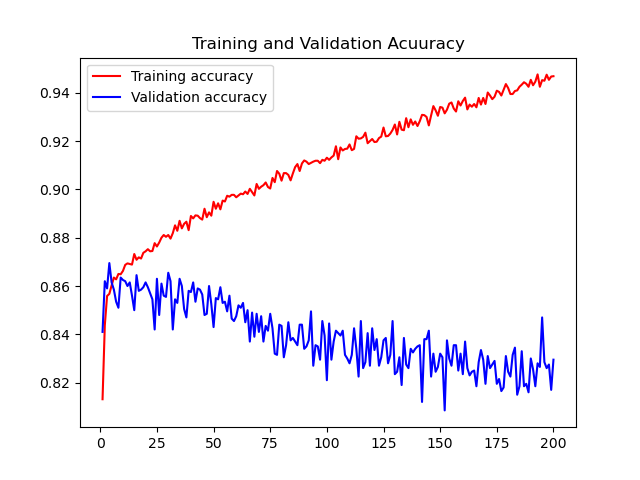

In [60]:
# Plot train and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,201)

plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Acuuracy')
plt.legend()
plt.show()

### Obviously the model is going to overfitting! So, make some changes to have more robust and generalized model. Also, Change accuracy metrics and adding callbacks to stop the process after enough epochs.

In [116]:
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=[12]),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    # Using sigmoid to produce 0 and 1 for binary classification
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100


C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.6698 - loss: 0.6003 - val_binary_accuracy: 0.8090 - val_loss: 0.4423
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8043 - loss: 0.4459 - val_binary_accuracy: 0.8165 - val_loss: 0.4273
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8054 - loss: 0.4336 - val_binary_accuracy: 0.8205 - val_loss: 0.4217
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8264 - loss: 0.4150 - val_binary_accuracy: 0.8205 - val_loss: 0.4164
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8126 - loss: 0.4251 - val_binary_accuracy: 0.8290 - val_loss: 0.4092
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8187 - loss: 0.4142 - val_binary_accuracy: 0.8360 - val_loss: 0.4032
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.8284 - loss: 0.4047 - val_binary_accuracy: 0.8445 - val_loss: 0.3932
Epoch 8/100

### Visulaize the final results

<IPython.core.display.Javascript object>


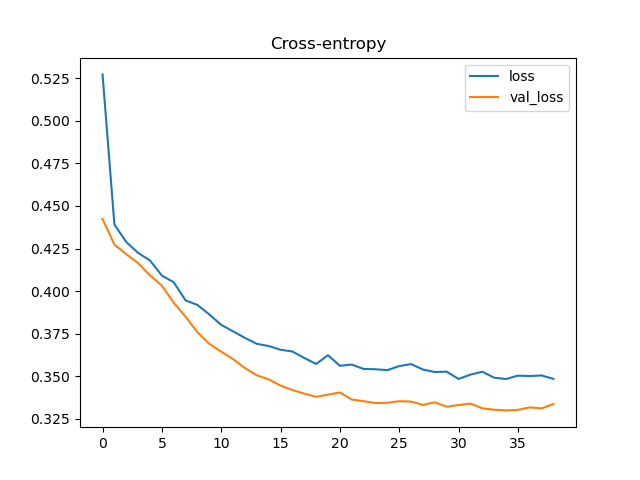

<IPython.core.display.Javascript object>


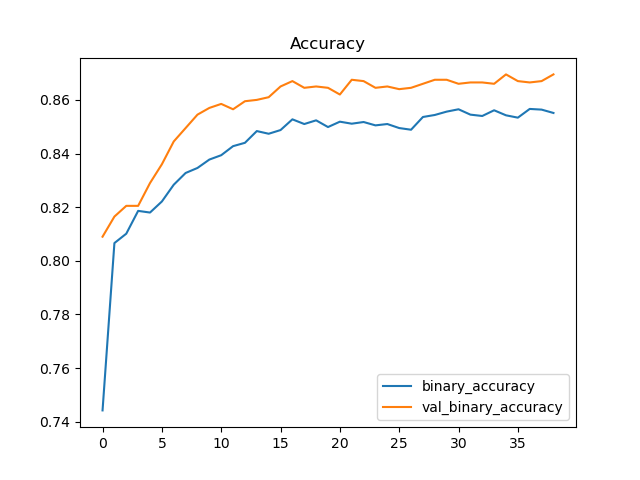

<Axes: title={'center': 'Accuracy'}>

In [122]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

### It's Done! Just with 12 neuron as hidden layer the model training and validation score converged to each other smoothly. If add layers or neurons to the model, diagram of outputs are not smooth enough and going to take noisy shape, and also the probability of overfitting is going to be higher.

### So, the final model in this part achieved as above results with these hyperparameters:
#### 1- Model structured with one batch normalization layer as input, one hidden layer with only 12 neurons, and one single neuron output with sigmoid activation function in order to binary classification.
#### 2- Compiled with adam optimizer, loss function is chose binary-crossentropy as it is a binary classification problem, and also used accuracy metrics to compare the model's performance.
#### 3- Used callback to stop the process after reaching acceptable values which guaranteed to avoid underfitting and overfitting problems.

# +++++++++++++++++++++++++++
# Part 2: Concrete Crack Detection
# +++++++++++++++++++++++++++
### The datasets contain images of various concrete surfaces with and without crack. The image data is divided into two as negative (without crack) and positive (with crack) in a separate folder for image classification. Each class has 20000 images with a total of 40000 images with 227 x 227 pixels with RGB channels.

In [97]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Import Data
### Pick first 20% of the images (4000 images) as validation set. So, train_set file has 16k images and valid_set file has 4k images for each class.
### Extract zipfiles and make a directory for the images.

In [98]:
# Unzip training set
zip_ref = zipfile.ZipFile('train_set.zip')
zip_ref.extractall('train_set')

# Unzip validation set
zip_ref = zipfile.ZipFile('valid_set.zip')
zip_ref.extractall('valid_set')
zip_ref.close()

## **********************************************************************************
## Task 1 + Bonus Task: Preprocess the images + Data Augmentation
## **********************************************************************************
### Data Normalization and Augmentation with ImageDataGenerator to apply rotation, shift, and flip the images to enhance the network's performance.

In [123]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directory in batches of 200
train_generator = train_datagen.flow_from_directory('train_set/train_set', 
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

valid_generator = valid_datagen.flow_from_directory('valid_set/valid_set',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


## ************************
## Task 2: Create CNN
## ************************
### Construct and train a convolutional neural network for detecting the surface cracks and optimize it.

In [124]:
# Model Structure
model = tf.keras.models.Sequential([
    # one input batch normalization layer
    tf.keras.layers.BatchNormalization(input_shape=(150,150,3)),    # Using 150x150 target size with 3 channels
    
    # 3 convolution layer
    # First conv
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Second conv
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Third conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    # Dropout layer with 0.3 probability
    tf.keras.layers.Dropout(0.3),
    
    # 1 neuron output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Print the model summary

In [125]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_24          │ (None, 150, 150, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 148, 148, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 72, 72, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,497,069 (36.23 MB)

 Trainable params: 9,495,815 (36.22 MB)

 Non-trainable params: 1,254 (4.90 KB)

### Compile the model

In [126]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])

### Train the model

In [127]:
model.fit(train_generator,
         steps_per_epoch=1600,
         epochs=10,
         validation_data=valid_generator,
         validation_steps=400,
         verbose=1)

C:\Users\sajad\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1290s 803ms/step - binary_accuracy: 0.9531 - loss: 0.1368 - val_binary_accuracy: 0.8946 - val_loss: 0.3729
Epoch 2/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1047s 655ms/step - binary_accuracy: 0.9853 - loss: 0.0477 - val_binary_accuracy: 0.9523 - val_loss: 0.2223
Epoch 4/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1073s 670ms/step - binary_accuracy: 0.9874 - loss: 0.0465 - val_binary_accuracy: 0.8689 - val_loss: 0.5821
Epoch 6/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1125s 703ms/step - binary_accuracy: 0.9870 - loss: 0.0473 - val_binary_accuracy: 0.9496 - val_loss: 0.1861
Epoch 8/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 1084s 677ms/step - binary_accuracy: 0.9903 - loss: 0.0365 - val_binary_accuracy: 0.8534 - val_loss: 0.5511
Epoch 10/10
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+0

## ********************************************
## Task 3: Model Evaluation & Results
## ********************************************

## After 10 epochs: binary_accuracy: 0.9903 - loss: 0.0365 - val_binary_accuracy: 0.8534 - val_loss: 0.5511

### Visualize train and validation accuracy, and also binary loss of the model to check the model's performance.